<a href="https://colab.research.google.com/github/ankitpatil24/mlproject/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

In [ ]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)

GaussianNB()

In [ ]:
print(clf.predict(features_test[:5]))

[0. 1. 1. 0. 1.]


In [ ]:
features_train

[[0.6394267984578837, 0.09935462460613032],
 [0.025010755222666936, 0.6856802654812854],
 [0.27502931836911926, 0.5444658614821449],
 [0.22321073814882275, 0.9778425294520467],
 [0.7364712141640124, 0.35867384121231793],
 [0.6766994874229113, 0.3981396427443731],
 [0.8921795677048454, 0.18980856216107955],
 [0.08693883262941615, 0.12215971908726375],
 [0.4219218196852704, 0.848033188463681],
 [0.029797219438070344, 0.45471736857051714],
 [0.21863797480360336, 0.662768738061978],
 [0.5053552881033624, 0.6417044672332176],
 [0.026535969683863625, 0.5971459595195451],
 [0.1988376506866485, 0.02135745473637063],
 [0.6498844377795232, 0.7867945904546167],
 [0.5449414806032167, 0.24356889716402363],
 [0.2204406220406967, 0.12592388530804288],
 [0.5892656838759087, 0.5645779759079633],
 [0.8094304566778266, 0.0686101528243559],
 [0.006498759678061017, 0.7651573758885845],
 [0.8058192518328079, 0.2071573703466585],
 [0.6981393949882269, 0.21595135191867476],
 [0.3402505165179919, 0.86969542676

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")

import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print(image_start+json.dumps(data)+image_end)

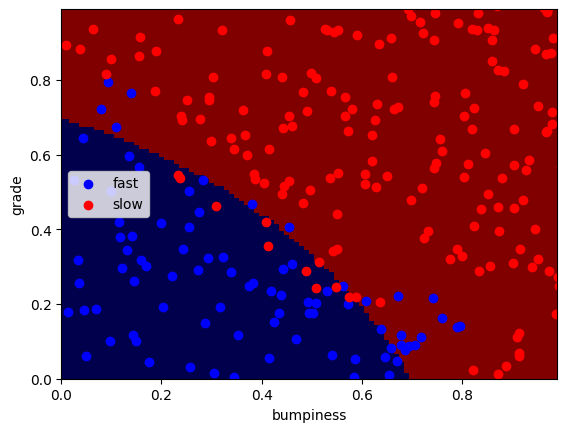

In [ ]:
prettyPicture(clf, features_test, labels_test)

In [ ]:
def NBAccuracy(features_train, labels_train, features_test, labels_test):
    """ compute the accuracy of your Naive Bayes classifier """
    ### import the sklearn module for GaussianNB
    from sklearn.naive_bayes import GaussianNB

    ### create classifier
    clf = GaussianNB()

    ### fit the classifier on the training features and labels
    clf.fit(features_train,labels_train)

    ### use the trained classifier to predict labels for the test features
    pred = clf.predict(features_test)


    ### calculate and return the accuracy on the test data
    ### this is slightly different than the example,
    ### where we just print the accuracy
    ### you might need to import an sklearn module
    accuracy = clf.score(features_test, labels_test)
    return accuracy

In [ ]:
accuracy = NBAccuracy(features_train, labels_train, features_test, labels_test)
accuracy

0.884

In [ ]:
import pandas as pd

# read text file into pandas DataFrame and create header with names
df = pd.read_csv("/content/train_data.txt", sep=" ::: ", header=None,
                 names=["ID", "TITLE","GENRE","DESCRIPTION"])

# display DataFrame
print(df)

<ipython-input-3-096844baf4ee>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/content/train_data.txt", sep=" ::: ", header=None,


          ID                                       TITLE         YEAR  \
0          1                Oscar et la dame rose (2009)        drama   
1          2                                Cupid (1997)     thriller   
2          3            Young, Wild and Wonderful (1980)        adult   
3          4                       The Secret Sin (1915)        drama   
4          5                      The Unrecovered (2007)        drama   
...      ...                                         ...          ...   
54209  54210                             "Bonino" (1953)       comedy   
54210  54211                 Dead Girls Don't Cry (????)       horror   
54211  54212   Ronald Goedemondt: Ze bestaan echt (2008)  documentary   
54212  54213                    Make Your Own Bed (1944)       comedy   
54213  54214  Nature's Fury: Storm of the Century (2006)      history   

                                                   GENRE  DESCRIPTION  
0      Listening in to a conversation between his d

In [ ]:
import re
re.split(r"\s+", target_string)
df['TITLE'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,Oscar,et,la,dame,rose,(2009),None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Cupid,(1997),None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"Young,",Wild,and,Wonderful,(1980),None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,The,Secret,Sin,(1915),None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,The,Unrecovered,(2007),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54209,"""Bonino""",(1953),None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
54210,Dead,Girls,Don't,Cry,(????),None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
54211,Ronald,Goedemondt:,Ze,bestaan,echt,(2008),None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
54212,Make,Your,Own,Bed,(1944),None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
